Init Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

Hide Warning Deprecated Shapely 2.0

In [27]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

Load Shape file

In [28]:
jbmap = gpd.read_file('shape/jawabarat.shp')

<AxesSubplot:>

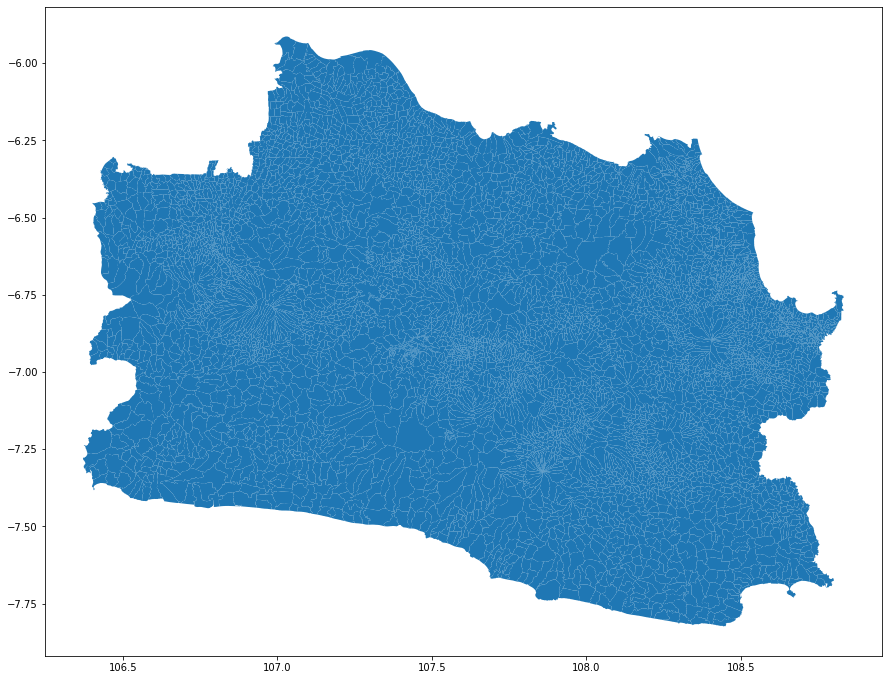

In [29]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)

Tambah titik koordinat

In [38]:
df = pd.read_csv('shape/tollpoint.csv',sep=";")
titik = []
for locs in df['koord'].str.split(","):
    multilocs = []
    for x in locs:
        multilocs.append(Point(float(x.split(" ")[0]),float(x.split(" ")[1])))
    if len(multilocs)>1:
        titik.append(LineString(multilocs))
    else:
        titik.append(multilocs[0])
geo = gpd.GeoDataFrame(df,geometry=titik)

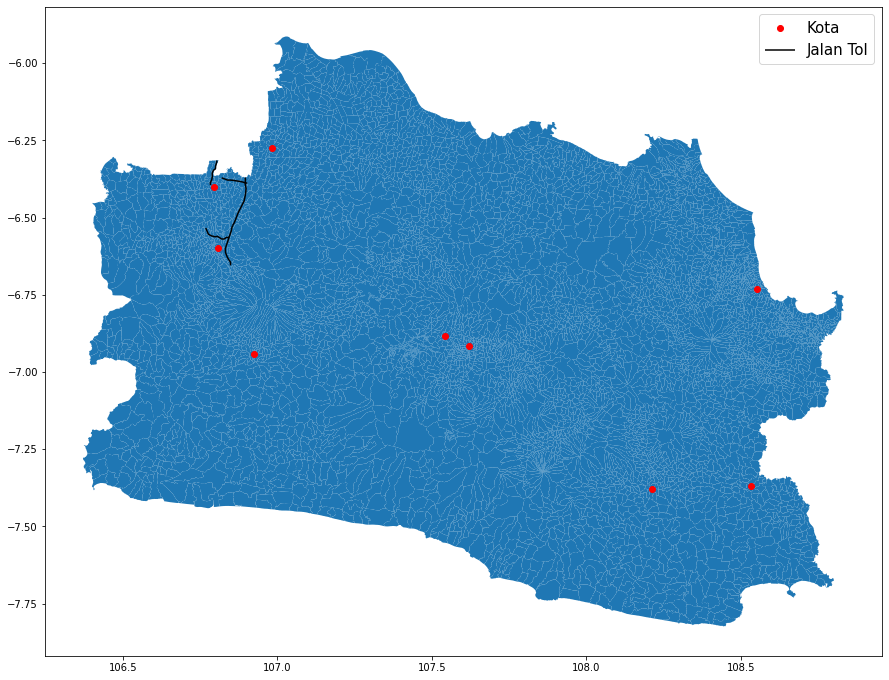

In [39]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)
geo[geo['tipe']=='city'].plot(ax=ax, color='red', label='Kota')
geo[geo['tipe']=='toll'].plot(ax=ax, color='black', label='Jalan Tol')
plt.legend(prop = {"size":15})